In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4i/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4i/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [3]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.0,0.938754,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.561414,...,0,25,0.000000,0.000000,0,,0,,0.500000,YES
1,0.0,1.624541,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,2.706102,...,0,25,0.600000,0.000000,0,,0,,0.333333,NO
2,0.0,1.894108,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.375355,...,0,19,0.200000,0.000000,0,,0,,0.250000,UNKNOWN
3,0.0,1.989939,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.503376,...,0,32,1.000000,0.000000,0,,0,,0.333333,YES
4,0.0,1.949269,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.631440,...,0,13,0.400000,0.000000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,1.905533,1.781937,3.849615,0.00377,0.329502,0.102195,0.500263,0.500263,3.587219,...,1,15,0.400000,0.196467,0,,0,,0.500000,UNKNOWN
796,0.0,1.995499,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.165892,...,0,22,0.777778,0.000000,0,,0,,0.666667,YES
797,0.0,1.491480,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.157142,...,0,19,0.666667,0.000000,0,,0,,0.500000,UNKNOWN
798,0.0,1.650882,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.808481,...,0,21,1.000000,0.000000,0,,0,,1.000000,NO


In [4]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'verbT', 'negH', 'verbH',
       'overlap_ent', 'clases'],
      dtype='object')

In [5]:
train["KL_divergence"].unique()

array([0.        , 0.05908942, 0.11005178, 0.21769435, 0.598045  ,
       0.39909596, 0.27383712, 0.77536269, 0.46707164, 0.34906874,
       0.4422892 , 0.43183313, 0.42606637, 0.52536624, 1.36257008,
       0.22807217, 0.1095351 , 0.1110584 , 0.43474621, 0.15253316,
       0.24450676, 0.17556444, 0.22325101, 1.06319383, 0.17470831,
       0.22138867, 0.22346488, 0.13897788, 0.703607  , 0.29678274,
       0.90046433, 0.13136268, 0.1828255 , 0.17945107, 0.27975519,
       0.17661946, 0.16012701, 0.08972925, 0.58832661, 0.54056838,
       0.24587167, 0.41451032, 0.18482869, 0.24073536, 0.2378925 ,
       0.76863418, 0.17967217, 0.05044279, 0.15446767, 0.09606492,
       0.29819696, 0.19805457, 0.47762453, 0.27931509, 0.10222527,
       0.11972388, 0.07251857, 0.36208239, 0.02710222, 0.07963055,
       0.01561291, 0.12621709, 0.39138959, 0.28418912, 0.0856165 ,
       0.09412417, 0.4342967 , 0.23138797, 0.14538647, 0.38958071,
       0.20030596, 0.03687848, 0.07641197, 0.31032343, 0.09426

<Axes: title={'center': 'entropia_relaciones'}, xlabel='clases'>

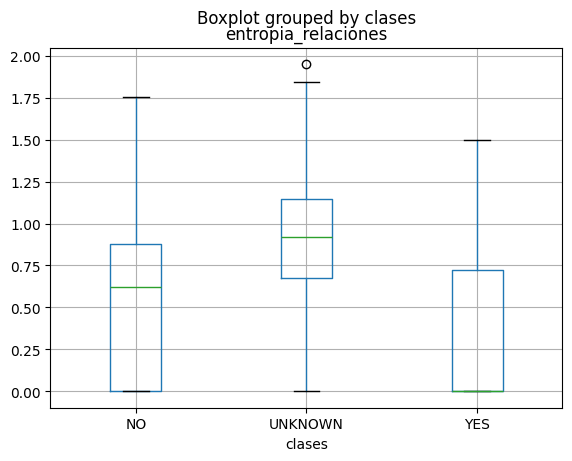

In [6]:
train.boxplot(by="clases",column="entropia_relaciones")

In [7]:
import scipy.stats as stats
for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]
    grupo_c = train[(train['clases']=="NO")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor,"UNKNOWN-YES")
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"UNKNOWN-YES")
    
    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_b, grupo_c)

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor,"YES-NO")
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"YES-NO")
    
    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_c)

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor,"UNKNOWN-NO")
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"UNKNOWN-NO")

No hay evidencia de una diferencia significativa entre los grupos. distancias YES-NO
No hay evidencia de una diferencia significativa entre los grupos. entropia_total UNKNOWN-YES
No hay evidencia de una diferencia significativa entre los grupos. entropia_total YES-NO
No hay evidencia de una diferencia significativa entre los grupos. entropia_total UNKNOWN-NO
No hay evidencia de una diferencia significativa entre los grupos. entropias YES-NO
No hay evidencia de una diferencia significativa entre los grupos. mutinf YES-NO
No hay evidencia de una diferencia significativa entre los grupos. mearts YES-NO
No hay evidencia de una diferencia significativa entre los grupos. max_info YES-NO
No hay evidencia de una diferencia significativa entre los grupos. max_info UNKNOWN-NO
No hay evidencia de una diferencia significativa entre los grupos. sumas YES-NO
No hay evidencia de una diferencia significativa entre los grupos. sumas UNKNOWN-NO
No hay evidencia de una diferencia significativa entre los 

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## Eliminar características

In [8]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.0,0.938754,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.561414,...,0,25,0.000000,0.000000,0,,0,,0.500000,YES
1,0.0,1.624541,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,2.706102,...,0,25,0.600000,0.000000,0,,0,,0.333333,NO
2,0.0,1.894108,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.375355,...,0,19,0.200000,0.000000,0,,0,,0.250000,UNKNOWN
3,0.0,1.989939,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.503376,...,0,32,1.000000,0.000000,0,,0,,0.333333,YES
4,0.0,1.949269,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.631440,...,0,13,0.400000,0.000000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,1.905533,1.781937,3.849615,0.00377,0.329502,0.102195,0.500263,0.500263,3.587219,...,1,15,0.400000,0.196467,0,,0,,0.500000,UNKNOWN
796,0.0,1.995499,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.165892,...,0,22,0.777778,0.000000,0,,0,,0.666667,YES
797,0.0,1.491480,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.157142,...,0,19,0.666667,0.000000,0,,0,,0.500000,UNKNOWN
798,0.0,1.650882,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.808481,...,0,21,1.000000,0.000000,0,,0,,1.000000,NO


In [9]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
27,0.999965,2.116668,1.334679,3.875875,0.003966,0.090035,-0.004140,0.176170,0.176170,4.512243,...,1,13,0.250000,0.467072,0,,0,,0.333333,YES
38,1.000024,1.367640,1.352030,3.744154,0.003230,0.374629,0.091217,0.433047,0.433047,3.439258,...,1,13,0.800000,0.442289,0,,0,,0.000000,YES
50,1.000024,1.204931,1.727397,3.778260,0.003230,0.374629,0.090212,0.433047,0.433047,3.128523,...,1,14,0.250000,0.525366,0,,0,,0.000000,YES
69,0.929400,1.338641,1.879965,3.793756,0.004661,0.568112,0.137384,0.628892,0.628892,2.592961,...,1,9,0.000000,0.434746,0,,0,,0.333333,YES
71,1.253178,1.942692,1.598817,3.974547,0.003907,0.214755,0.011389,0.300463,0.300463,4.604572,...,1,24,0.500000,0.152533,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,0.999979,2.034158,1.581450,3.954633,0.003378,0.317772,0.039530,0.436073,0.436073,4.049781,...,2,19,0.545455,0.135124,0,,1,sell,0.600000,YES
772,1.249022,2.231961,1.677421,3.946730,0.003056,0.219934,0.059983,0.325474,0.325474,4.663605,...,1,16,0.857143,0.230077,0,,0,,0.750000,YES
779,1.104601,2.043669,2.065451,3.936022,0.003553,0.389897,0.095154,0.600064,0.600064,4.585575,...,1,25,0.571429,0.197474,0,,0,,0.500000,YES
791,1.114817,2.204856,2.052421,3.949004,0.003593,0.378576,0.110086,0.479275,0.479275,4.460816,...,1,16,0.666667,0.549036,1,make,0,,0.250000,YES


In [10]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'verbT', 'negH', 'verbH',
       'overlap_ent', 'clases'],
      dtype='object')

# Integrar características

In [11]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
train["mutinf"]=train["mutinf_t"]-train["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
train["max_info"]=train["max_info_t"]-train["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
train["entropias"]=train["entropia_total"]-train["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
train["sumas"]=train["sumas_t"]-train["sumas"]
train["list_m"]=train["list_m"]/train["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

In [12]:
train=train.drop(["verbT","verbH"],axis=1)

In [13]:
# train["mearts"]=train["mearts"]*train["distancias"]
# train=train.drop(["distancias","list_incomp","negH","max_info"],axis=1)

In [14]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

In [15]:
#train = train[['entropia_relaciones','Jaro-Winkler_rit','overlap_ent','no_match', 'contra', 'entail',  'neutral','clases']]

In [16]:
train = train[['negH','negT','mutinf','max_info','list_comp', 'list_incomp', 'rel_conceptuales','diferencias','entropia_relaciones','nlp_semantics','overlap_ent','Jaro-Winkler_rit','clases']]
train

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases
0,0,0,1.561414,0.333333,0,0,0,0.000000,0.000000,1.000000,0.500000,0.000000,YES
1,0,0,2.706102,0.504683,1,0,0,0.000000,0.000000,1.000000,0.333333,0.600000,NO
2,0,0,4.375355,0.802840,2,0,0,0.000000,0.000000,1.000000,0.250000,0.200000,UNKNOWN
3,0,0,4.503376,1.000000,0,0,0,0.000000,0.000000,1.000000,0.333333,1.000000,YES
4,0,0,3.631440,0.676320,1,0,0,0.000000,0.000000,1.000000,0.666667,0.400000,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,-0.262397,0.336399,0,0,0,0.066667,0.721928,0.500263,0.500000,0.400000,UNKNOWN
796,0,0,4.165892,0.888889,0,0,0,0.000000,0.000000,1.000000,0.666667,0.777778,YES
797,0,0,3.157142,0.666667,0,0,0,0.000000,0.000000,1.000000,0.500000,0.666667,UNKNOWN
798,0,0,3.808481,0.800000,0,0,0,0.000000,0.000000,1.000000,1.000000,1.000000,NO


In [17]:
train.columns

Index(['negH', 'negT', 'mutinf', 'max_info', 'list_comp', 'list_incomp',
       'rel_conceptuales', 'diferencias', 'entropia_relaciones',
       'nlp_semantics', 'overlap_ent', 'Jaro-Winkler_rit', 'clases'],
      dtype='object')

In [18]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [19]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [20]:
train_m

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
negH,1.000000,0.091520,-0.060730,-0.057157,-0.035240,0.101964,-0.013184,0.012526,0.040421,-0.020183,0.046459,0.034834
negT,0.091520,1.000000,0.036439,0.038774,0.010319,-0.010385,-0.012666,-0.047766,-0.062397,0.084263,0.044363,0.079997
mutinf,-0.060730,0.036439,1.000000,0.891242,-0.219463,-0.029767,-0.105064,-0.627202,-0.734502,0.648401,0.316159,0.381064
max_info,-0.057157,0.038774,0.891242,1.000000,-0.374331,-0.081406,-0.209310,-0.630264,-0.722730,0.563186,0.432437,0.466657
list_comp,-0.035240,0.010319,-0.219463,-0.374331,1.000000,-0.000572,0.140452,0.218117,0.174273,-0.102945,-0.341990,-0.130022
list_incomp,0.101964,-0.010385,-0.029767,-0.081406,-0.000572,1.000000,0.216779,0.092786,0.274226,-0.078730,-0.023925,-0.056680
rel_conceptuales,-0.013184,-0.012666,-0.105064,-0.209310,0.140452,0.216779,1.000000,0.177245,0.605049,-0.283104,-0.220810,-0.271060
diferencias,0.012526,-0.047766,-0.627202,-0.630264,0.218117,0.092786,0.177245,1.000000,0.602294,-0.440417,-0.302521,-0.355242
entropia_relaciones,0.040421,-0.062397,-0.734502,-0.722730,0.174273,0.274226,0.605049,0.602294,1.000000,-0.756938,-0.374595,-0.463929
nlp_semantics,-0.020183,0.084263,0.648401,0.563186,-0.102945,-0.078730,-0.283104,-0.440417,-0.756938,1.000000,0.289722,0.328981


<Axes: >

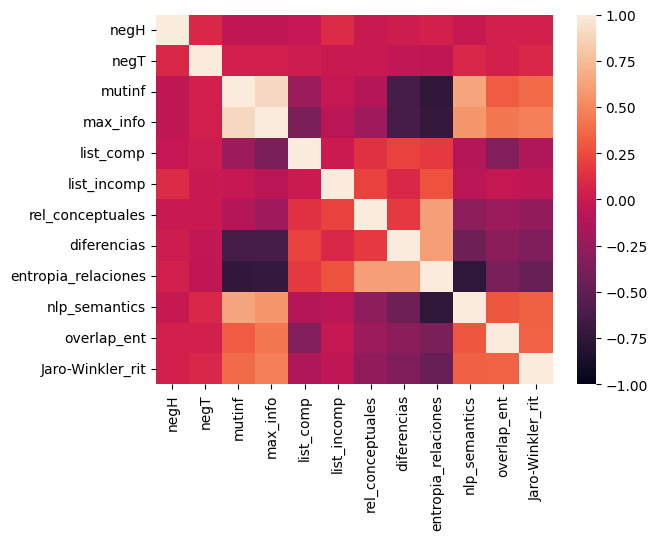

In [21]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [22]:
train_m

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
negH,1.000000,0.091520,-0.060730,-0.057157,-0.035240,0.101964,-0.013184,0.012526,0.040421,-0.020183,0.046459,0.034834
negT,0.091520,1.000000,0.036439,0.038774,0.010319,-0.010385,-0.012666,-0.047766,-0.062397,0.084263,0.044363,0.079997
mutinf,-0.060730,0.036439,1.000000,0.891242,-0.219463,-0.029767,-0.105064,-0.627202,-0.734502,0.648401,0.316159,0.381064
max_info,-0.057157,0.038774,0.891242,1.000000,-0.374331,-0.081406,-0.209310,-0.630264,-0.722730,0.563186,0.432437,0.466657
list_comp,-0.035240,0.010319,-0.219463,-0.374331,1.000000,-0.000572,0.140452,0.218117,0.174273,-0.102945,-0.341990,-0.130022
list_incomp,0.101964,-0.010385,-0.029767,-0.081406,-0.000572,1.000000,0.216779,0.092786,0.274226,-0.078730,-0.023925,-0.056680
rel_conceptuales,-0.013184,-0.012666,-0.105064,-0.209310,0.140452,0.216779,1.000000,0.177245,0.605049,-0.283104,-0.220810,-0.271060
diferencias,0.012526,-0.047766,-0.627202,-0.630264,0.218117,0.092786,0.177245,1.000000,0.602294,-0.440417,-0.302521,-0.355242
entropia_relaciones,0.040421,-0.062397,-0.734502,-0.722730,0.174273,0.274226,0.605049,0.602294,1.000000,-0.756938,-0.374595,-0.463929
nlp_semantics,-0.020183,0.084263,0.648401,0.563186,-0.102945,-0.078730,-0.283104,-0.440417,-0.756938,1.000000,0.289722,0.328981


In [23]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [24]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    elif i == "UNKNOWN":
        y_train.append(2)
    else:
        y_train.append(0)

In [25]:
y_train.count(0)

80

In [26]:
y_train.count(1)

412

In [27]:
y_train.count(2)

308

In [28]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

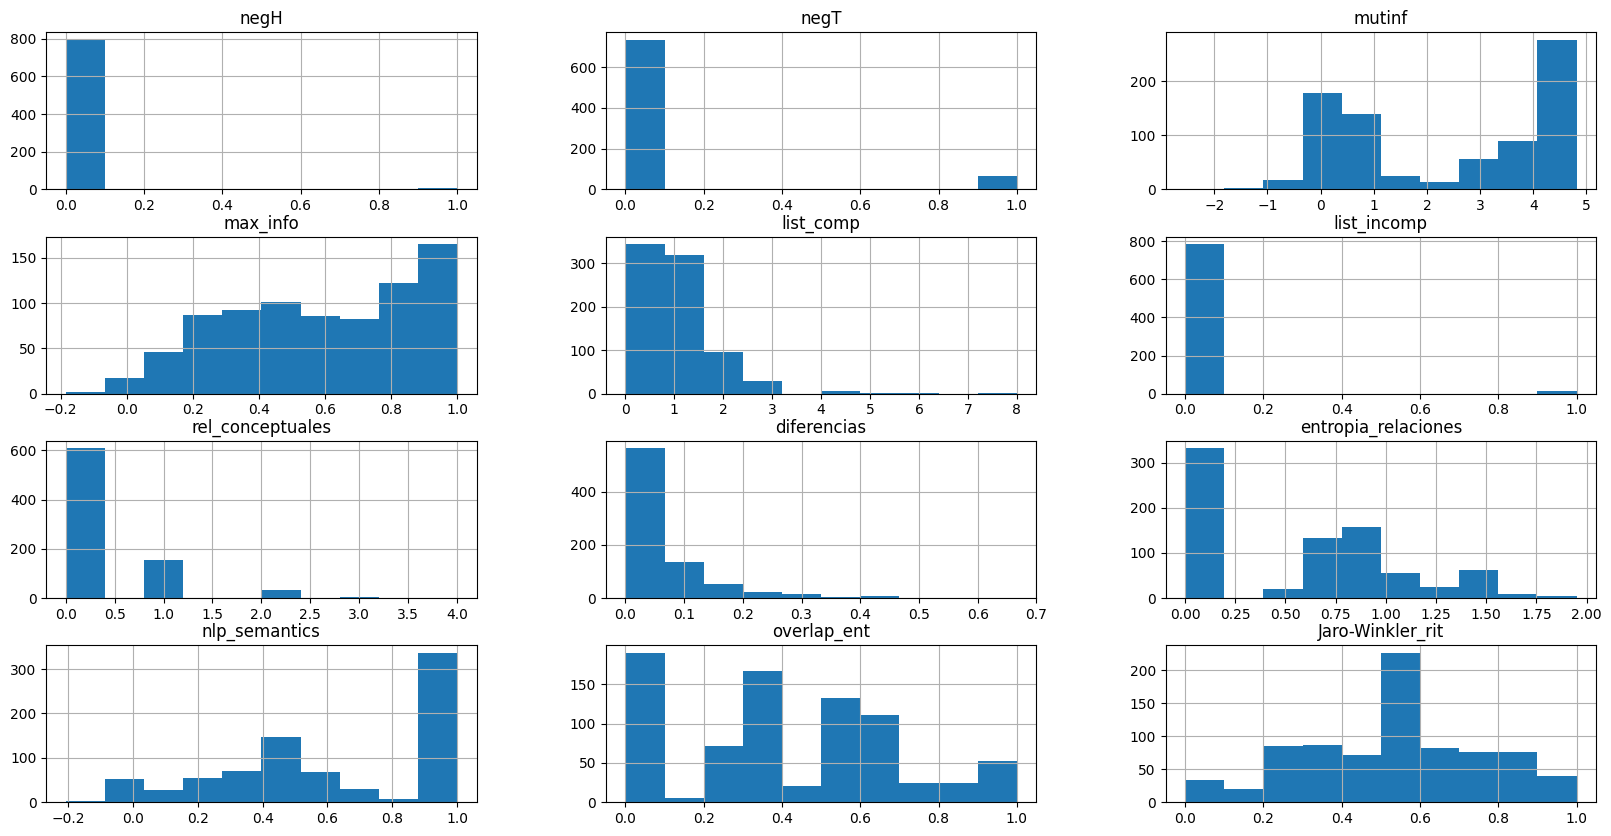

In [29]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [30]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4i/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4i/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [31]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,2.230984,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.434350,...,0,24,0.400000,0.000000,0,,0,,0.666667,YES
1,0.000000,2.068941,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.429481,...,0,24,0.600000,0.000000,0,,0,,0.333333,YES
2,0.000000,1.784534,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.155371,...,0,13,0.750000,0.000000,0,,0,,0.666667,YES
3,0.000000,1.866607,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.957290,...,0,18,0.833333,0.000000,0,,0,,1.000000,YES
4,1.000001,1.576721,1.807764,3.880129,0.004272,0.201056,0.046052,0.369879,0.369879,3.339943,...,1,17,0.750000,0.502912,0,,0,,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,2.183050,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.383406,...,0,18,0.400000,0.000000,1,rush,0,,0.500000,YES
796,0.000000,1.546023,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.178976,...,0,22,0.666667,0.000000,0,,0,,0.333333,NO
797,0.000000,1.869685,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.789178,...,0,23,1.000000,0.000000,0,,0,,0.666667,UNKNOWN
798,1.319180,1.766603,0.881291,3.781196,0.005778,0.129923,0.036628,0.129505,0.129505,4.466536,...,1,10,0.250000,0.339799,0,,0,,0.666667,UNKNOWN


In [32]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [33]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
test["mutinf"]=test["mutinf_t"]-test["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
test["max_info"]=test["max_info_t"]-test["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
test["entropias"]=test["entropia_total"]-test["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
test["sumas"]=test["sumas_t"]-test["sumas"]
test["list_m"]=test["list_m"]/test["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

In [34]:
test=test.drop(["verbT","verbH"],axis=1)

In [35]:
#test = test[['entropia_relaciones','Jaro-Winkler_rit','overlap_ent','no_match', 'contra', 'entail',  'neutral','clases']]
test = test[['negH','negT','mutinf','max_info','list_comp', 'list_incomp', 'rel_conceptuales','diferencias','entropia_relaciones','nlp_semantics','overlap_ent','Jaro-Winkler_rit','clases']]


In [36]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [37]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    elif i == "UNKNOWN":
        y_test.append(2)
    else:
        y_test.append(0)

In [38]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [39]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.32427622, ..., 1.        , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.56200638, ..., 1.        , 0.33333333,
        0.6       ],
       [0.        , 0.        , 0.90867873, ..., 1.        , 0.25      ,
        0.2       ],
       ...,
       [0.        , 0.        , 0.65567897, ..., 1.        , 0.5       ,
        0.66666667],
       [0.        , 0.        , 0.79094968, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.92913245, ..., 1.        , 0.66666667,
        0.4       ]])

In [40]:
X_train.shape

(800, 12)

In [41]:
model = LogisticRegression(penalty="l2", C=1,max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500)

In [42]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
model.decision_function(X_train)

array([[-0.97990043,  1.1742539 , -0.19435347],
       [-0.93086775,  1.12966938, -0.19880163],
       [-1.31277638,  1.16473631,  0.14804007],
       ...,
       [-0.69082077,  1.25964915, -0.56882838],
       [-0.3202826 ,  1.47463661, -1.15435402],
       [-1.03277443,  1.30930783, -0.2765334 ]])

In [44]:
labels=train.columns[:-1]
labels

Index(['negH', 'negT', 'mutinf', 'max_info', 'list_comp', 'list_incomp',
       'rel_conceptuales', 'diferencias', 'entropia_relaciones',
       'nlp_semantics', 'overlap_ent', 'Jaro-Winkler_rit'],
      dtype='object')

In [45]:
model.classes_

array([0, 1, 2])

In [46]:
model.coef_[0]

array([ 0.95168011,  0.45954365,  0.14315731, -0.19367705, -1.22205671,
        0.1911471 , -0.45469631,  0.02654634, -0.44323483, -0.36000058,
        0.44779763,  0.45929391])

In [47]:
coeficientes=model.coef_[0]

In [48]:
coeficientes

array([ 0.95168011,  0.45954365,  0.14315731, -0.19367705, -1.22205671,
        0.1911471 , -0.45469631,  0.02654634, -0.44323483, -0.36000058,
        0.44779763,  0.45929391])

In [49]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  0 negH 4 list_comp


In [50]:

n_columns=train.shape[1]-1

In [51]:
n_columns

12

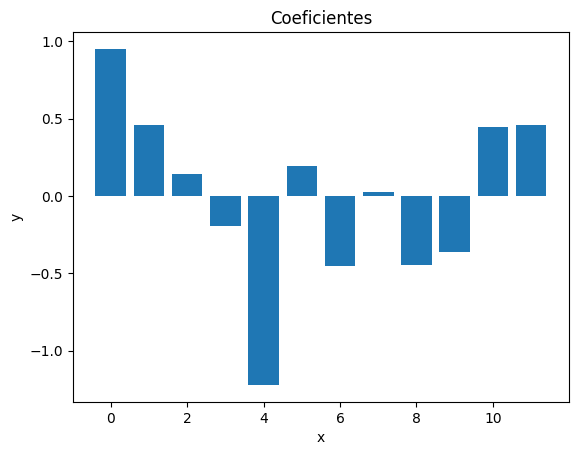

In [52]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [53]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.91931399, ..., 0.99999994, 0.66666667,
        0.4       ],
       [0.        , 0.        , 0.91830445, ..., 0.99999994, 0.33333333,
        0.6       ],
       [0.        , 0.        , 0.65416046, ..., 0.99999994, 0.66666667,
        0.75      ],
       ...,
       [0.        , 0.        , 0.99287573, ..., 0.99999994, 0.66666667,
        1.        ],
       [0.        , 0.        , 0.14208219, ..., 0.12950534, 0.66666667,
        0.25      ],
       [0.        , 0.        , 0.97457164, ..., 0.99999994, 1.        ,
        1.        ]])

In [54]:
X_test.shape

(800, 12)

In [55]:
predictions = model.predict(X_test)

In [56]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,

In [57]:
test["predicciones"]=predictions
test

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases,predicciones
0,0,0,4.434350,0.858036,1,0,0,0.000000,0.000000,1.000000,0.666667,0.400000,YES,1
1,0,0,4.429481,0.885372,1,0,0,0.000000,0.000000,1.000000,0.333333,0.600000,YES,1
2,0,0,3.155371,0.750000,0,0,0,0.000000,0.000000,1.000000,0.666667,0.750000,YES,1
3,0,0,3.957290,0.833333,0,0,0,0.000000,0.000000,1.000000,1.000000,0.833333,YES,1
4,0,0,-0.540186,0.349208,0,0,0,0.058824,0.811278,0.369879,1.000000,0.750000,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,4.383406,0.852755,2,0,0,0.000000,0.000000,1.000000,0.500000,0.400000,YES,1
796,0,0,3.178976,0.666667,0,0,0,0.000000,0.000000,1.000000,0.333333,0.666667,NO,1
797,0,0,4.789178,1.000000,0,0,0,0.000000,0.000000,1.000000,0.666667,1.000000,UNKNOWN,1
798,0,0,0.685339,0.652558,0,0,0,0.100000,0.811278,0.129505,0.666667,0.250000,UNKNOWN,1


In [58]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases,predicciones
288,1,1,0.515955,0.145846,0,0,1,0.1,1.370951,0.690879,0.75,0.2,YES,0


In [59]:
print(confusion_matrix(y_test, predictions))

[[  0  59  13]
 [  1 332  77]
 [  0 127 191]]


In [60]:
# [[  0  59  13]
#  [  1 348  61]
#  [  0 130 188]]
#  acccuracy:  0.67
# precision:  0.62
# recall 0.67
# f1_score:  0.63
# matthews_score:  0.39

In [61]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.65
precision:  0.6
recall 0.65
f1_score:  0.62
matthews_score:  0.36


In [62]:
# acccuracy:  0.66
# precision:  0.65
# recall 0.66
# f1_score:  0.63
# matthews_score:  0.36

In [63]:
# [[  1  52  19]
#  [  2 300 108]
#  [  0 111 207]]
#  acccuracy:  0.64
# precision:  0.61
# recall 0.64
# f1_score:  0.61
# matthews_score:  0.33

In [64]:
X_train.shape

(800, 12)

In [65]:
X_test.shape

(800, 12)

In [66]:
test=test.drop(["predicciones"],axis=1)
test

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases
0,0,0,4.434350,0.858036,1,0,0,0.000000,0.000000,1.000000,0.666667,0.400000,YES
1,0,0,4.429481,0.885372,1,0,0,0.000000,0.000000,1.000000,0.333333,0.600000,YES
2,0,0,3.155371,0.750000,0,0,0,0.000000,0.000000,1.000000,0.666667,0.750000,YES
3,0,0,3.957290,0.833333,0,0,0,0.000000,0.000000,1.000000,1.000000,0.833333,YES
4,0,0,-0.540186,0.349208,0,0,0,0.058824,0.811278,0.369879,1.000000,0.750000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,4.383406,0.852755,2,0,0,0.000000,0.000000,1.000000,0.500000,0.400000,YES
796,0,0,3.178976,0.666667,0,0,0,0.000000,0.000000,1.000000,0.333333,0.666667,NO
797,0,0,4.789178,1.000000,0,0,0,0.000000,0.000000,1.000000,0.666667,1.000000,UNKNOWN
798,0,0,0.685339,0.652558,0,0,0,0.100000,0.811278,0.129505,0.666667,0.250000,UNKNOWN


In [67]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [68]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [69]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s

Logistic Regression Acurracy:: 0.670000 (0.125529)
Logistic Regression Precision:: 0.630000 (0.153943)
Logistic Regression Recall:: 0.670000 (0.125529)
Logistic Regression F1-score:: 0.630000 (0.156191)


In [70]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s


Logistic Regression Precision:: 0.480000 (0.073784)
Logistic Regression Recall:: 0.480000 (0.075567)
Logistic Regression F1-score:: 0.450000 (0.090775)


In [71]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.680000 (0.109153)
Logistic Regression Recall:: 0.680000 (0.109153)
Logistic Regression F1-score:: 0.680000 (0.109153)


In [72]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.360000 (0.247121)


In [73]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [68]:
#linear_model

In [69]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [74]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))
print(confusion_matrix( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.64      0.81      0.72       410
           2       0.68      0.60      0.64       318

    accuracy                           0.65       800
   macro avg       0.44      0.47      0.45       800
weighted avg       0.60      0.65      0.62       800

[[  0  59  13]
 [  1 332  77]
 [  0 127 191]]


In [ ]:
#  precision    recall  f1-score   support

#            0       0.00      0.00      0.00        72
#            1       0.64      0.85      0.73       410
#            2       0.71      0.56      0.63       318

#     accuracy                           0.66       800
#    macro avg       0.45      0.47      0.45       800
# weighted avg       0.61      0.66      0.62       800

# [[  0  60  12]
#  [  0 350  60]
#  [  0 140 178]]

In [ ]:
#         precision    recall  f1-score   support

#            0       0.00      0.00      0.00        72
#            1       0.65      0.85      0.73       410
#            2       0.72      0.59      0.65       318

#     accuracy                           0.67       800
#    macro avg       0.46      0.48      0.46       800
# weighted avg       0.62      0.67      0.63       800

# [[  0  59  13]
#  [  1 348  61]

In [72]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [73]:
test.columns[:-2]

Index(['entropias', 'mutinf', 'mearts', 'sumas', 'no_match', 'diferencias',
       'entropia_relaciones', 'Jaro-Winkler_rit'],
      dtype='object')

In [74]:
explainer.expected_value

array([-0.92682569,  0.50890661,  0.41791908])

In [75]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.4       ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.8       ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.32312239, 0.2821871 , 0.17518758, ..., 0.42211679, 0.5       ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ]])

In [76]:
shap.plots.beeswarm(shap_values[:,:,0])

IndexError: list index out of range

In [ ]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.73121437 0.4449395  0.54671232 0.89697426 0.12872182 0.27823834
 0.09448722 0.74559537 0.05217773 0.64995841 0.19549815 0.
 0.05454545 0.         0.29411765 0.11111111 0.39285714 0.8
 0.         0.         0.33333333] 2 1


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

[0.         0.57687511 0.         0.         0.         0.
 0.         0.75079963 0.         0.79999987 0.21699325 0.
 0.         0.         0.29411765 0.         0.42857143 1.
 0.         0.         0.66666667]


IndexError: index 20 is out of bounds for axis 0 with size 20

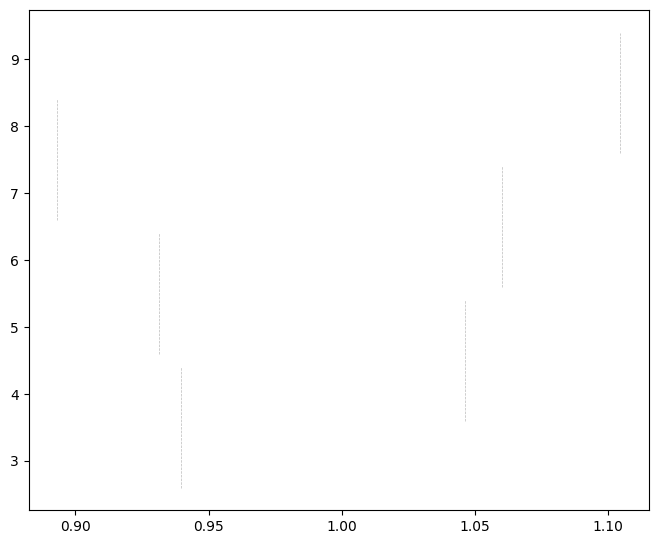

In [ ]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

IndexError: index 20 is out of bounds for axis 0 with size 20

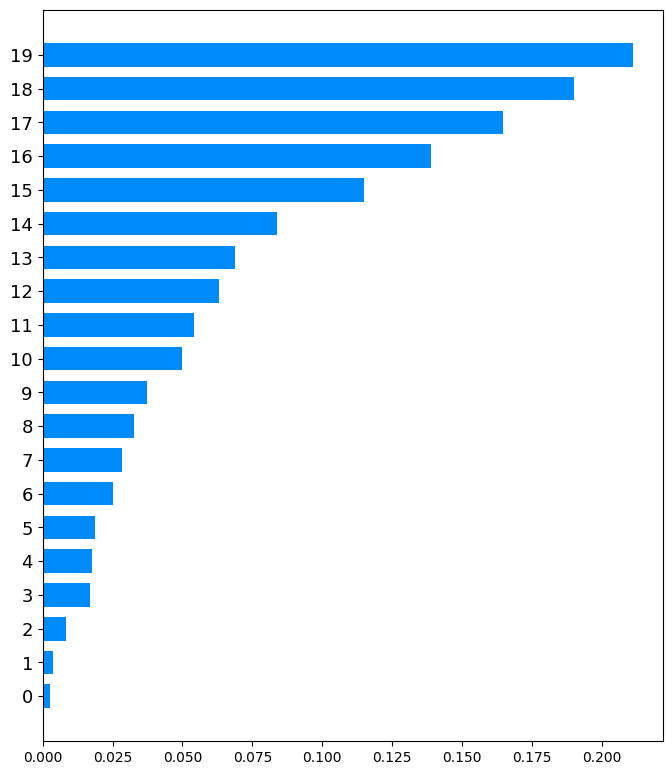

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_test,plot_type="bar")

IndexError: index 20 is out of bounds for axis 0 with size 20

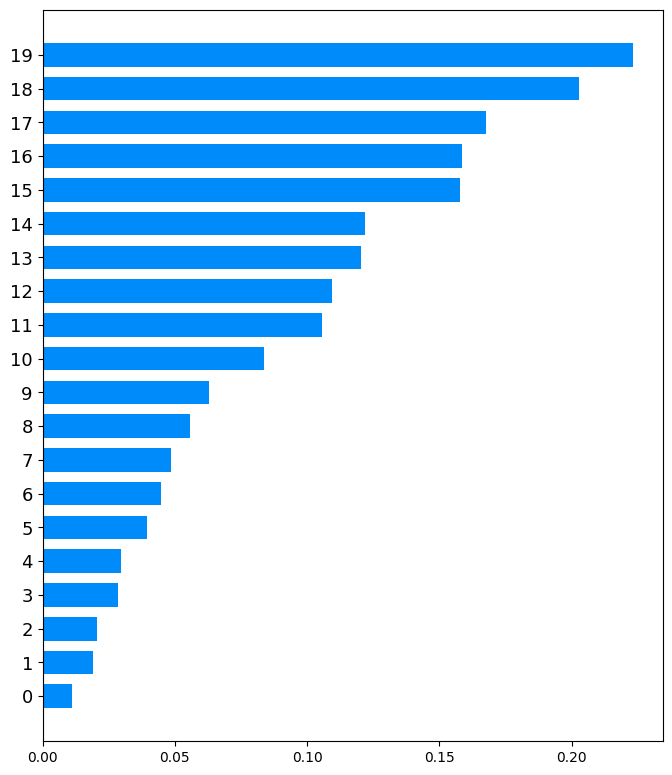

In [ ]:
shap.summary_plot(shap_values[:,:,2], X_test,plot_type="bar")

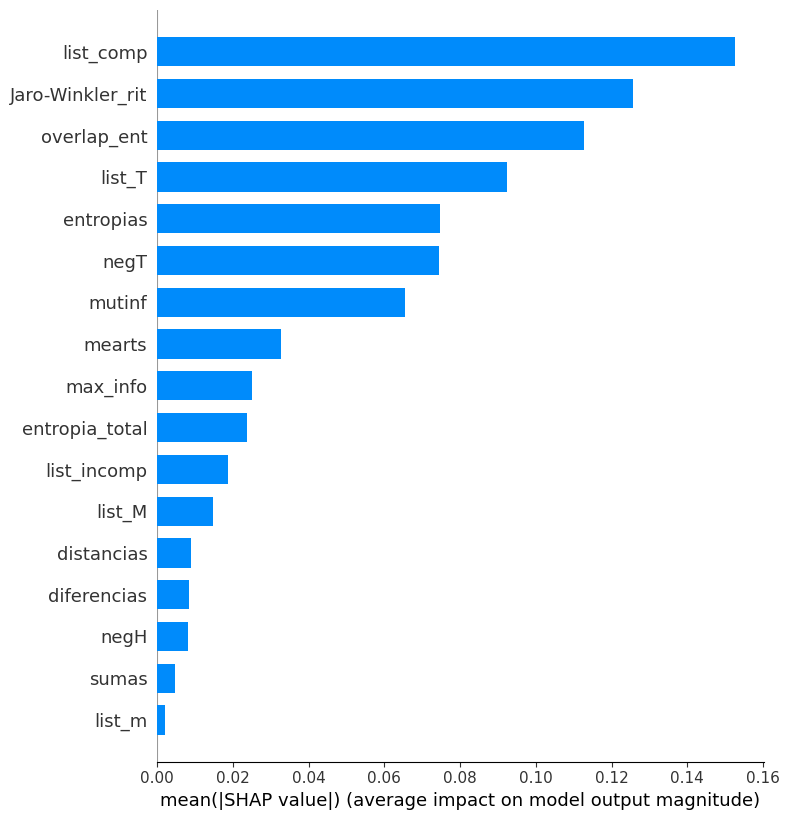

In [ ]:
shap.summary_plot(shap_values[:,:,0], X_test,plot_type="bar")

In [ ]:
shap.summary_plot(shap_values[:,:1], X_test[1:,])

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

IndexError: index 799 is out of bounds for axis 0 with size 798

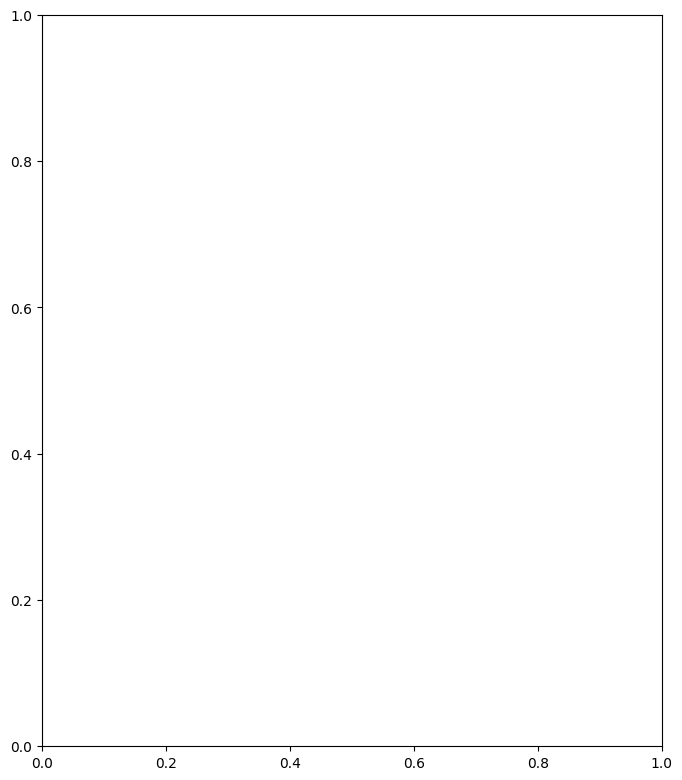

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_test[:-2],feature_names=test.columns[:-2])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

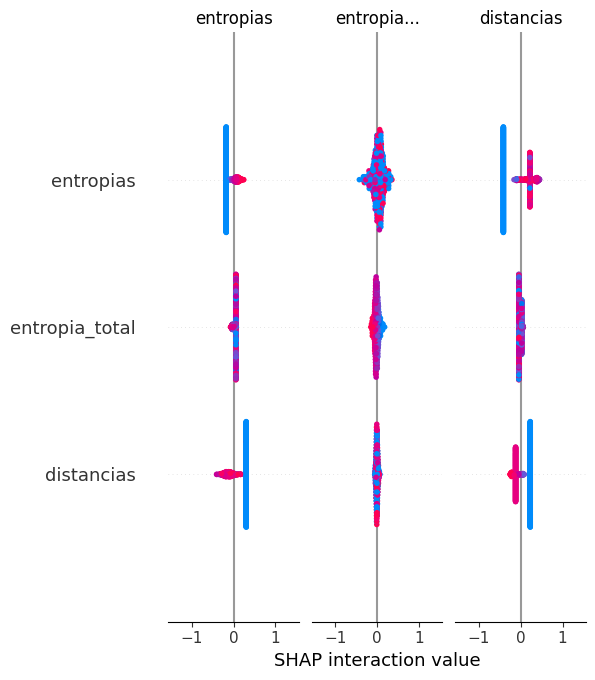

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


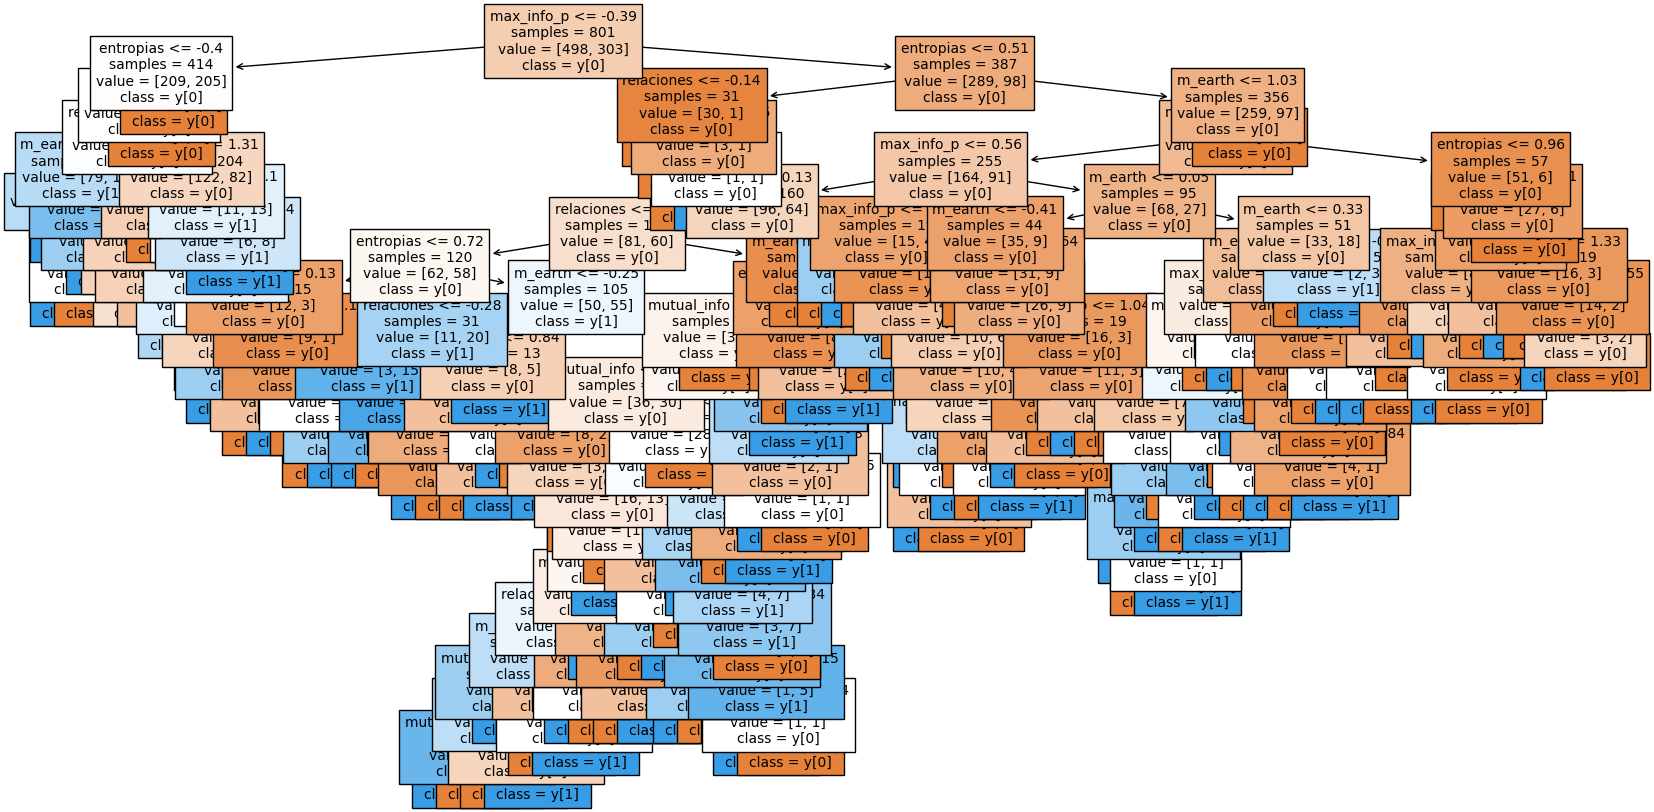

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )